In [1]:
!mkdir ~/.kaggle

In [2]:
#importing the dependencies
# Common Python libraries
!pip install mtcnn
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# For reading in images and image manipulation
import cv2

# For label encoding the target variable
from sklearn.preprocessing import LabelEncoder

# For tensor based operations
from tensorflow.keras.utils import to_categorical, normalize

# For Machine Learning
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# For face detection
from mtcnn.mtcnn import MTCNN


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.8 MB/s eta 0:00:00


In [3]:
# Reading in the csv file
train = pd.read_csv("/content/train.csv")

# Displaying the first five rows
train.head()


,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [4]:
#printing total number of data rows
print(f"Total number of rows: {len(train)}")

Total number of rows: 15412


In [5]:
# Total number of unique images
len(train["name"].unique())

4326

In [6]:
# printing the unique elements
train["classname"].unique()

array(['face_with_mask', 'mask_colorful', 'face_no_mask',
       'face_with_mask_incorrect', 'mask_surgical', 'face_other_covering',
       'scarf_bandana', 'eyeglasses', 'helmet', 'face_shield',
       'sunglasses', 'hood', 'hat', 'goggles', 'hair_net', 'hijab_niqab',
       'other', 'gas_mask', 'balaclava_ski_mask', 'turban'], dtype=object)

In [7]:
# classnames to select
options = ["face_with_mask", "face_no_mask"]

# Select rows that have the classname as either "face_with_mask" or "face_no_mask"
train = train[train["classname"].isin(options)].reset_index(drop=True)
train.sort_values("name", axis=0, inplace=True)

In [8]:
# printing unique elements
train["classname"].unique()

array(['face_no_mask', 'face_with_mask'], dtype=object)

In [9]:
train.head()

,name,x1,x2,y1,y2,classname
4974,1801.jpg,451,186,895,697,face_no_mask
1327,1802.jpg,110,71,273,272,face_with_mask
5524,1803.jpg,126,75,303,333,face_with_mask
2214,1804.jpg,112,113,262,307,face_with_mask
2330,1805.jpg,728,180,853,336,face_with_mask


<BarContainer object of 2 artists>

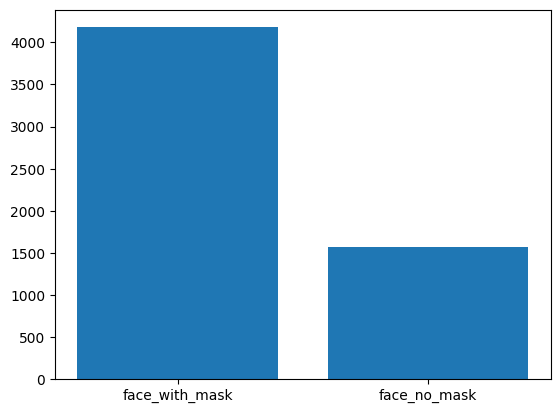

In [10]:
# Plotting a bar plot
x_axis_val = ["face_with_mask", "face_no_mask"]
y_axis_val = train.classname.value_counts()
plt.bar(x_axis_val, y_axis_val)

In [11]:
!pip install -q kaggle

In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cschauhan0304","key":"1402806a97b7e8109b2adb186a15924d"}'}

In [13]:
#create a kaggle folder
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [14]:
#copy kaggle.json to the folder created
! cp kaggle.json ~/.kaggle/

In [15]:
# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [16]:
! kaggle datasets list

ref                                                                 title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                   66KB  2024-06-12 23:09:20          18475        408  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                  496KB  2024-06-15 18:50:51          13874        294  1.0              
dataanalyst001/world-literacy-rate-by-country                       World Literacy Rate by Country                      2KB  2024-07-15 08:28:28            888         22  1.0              
ihelon/coffee-sales                               

In [17]:
!kaggle datasets download -d wobotintelligence/face-mask-detection-dataset/

Dataset URL: https://www.kaggle.com/datasets/wobotintelligence/face-mask-detection-dataset/versions/
License(s): CC0-1.0
100% 2.50G/2.50G [01:35<00:00, 33.1MB/s]
100% 2.50G/2.50G [01:35<00:00, 28.1MB/s]


In [18]:
# Unzip the file to a directory named 'unzipped_files'
!unzip /content/face-mask-detection-dataset.zip -d /content/unzipped_files

Streaming output truncated to the last 5000 lines.
  inflating: /content/unzipped_files/Medical mask/Medical mask/Medical Mask/images/1091.jpg  
  inflating: /content/unzipped_files/Medical mask/Medical mask/Medical Mask/images/1092.jpg  
  inflating: /content/unzipped_files/Medical mask/Medical mask/Medical Mask/images/1093.jpg  
  inflating: /content/unzipped_files/Medical mask/Medical mask/Medical Mask/images/1094.jpg  
  inflating: /content/unzipped_files/Medical mask/Medical mask/Medical Mask/images/1095.jpg  
  inflating: /content/unzipped_files/Medical mask/Medical mask/Medical Mask/images/1096.jpg  
  inflating: /content/unzipped_files/Medical mask/Medical mask/Medical Mask/images/1097.jpg  
  inflating: /content/unzipped_files/Medical mask/Medical mask/Medical Mask/images/1098.jpg  
  inflating: /content/unzipped_files/Medical mask/Medical mask/Medical Mask/images/1099.jpg  
  inflating: /content/unzipped_files/Medical mask/Medical mask/Medical Mask/images/1101.jpg  
  inflati

In [19]:
# Contains images of medical masks
images_file_path = "unzipped_files/Medical mask/Medical mask/Medical Mask/images/"

print(f"Images file path: {images_file_path}")


Images file path: unzipped_files/Medical mask/Medical mask/Medical Mask/images/


In [20]:
# Fetching all the file names in the image directory
image_filenames = os.listdir(images_file_path)

print(f"Number of images: {len(images_file_path)}")

# Printing out the first five image names
print(image_filenames[:5])

Number of images: 61
['4149.png', '5648.jpg', '2754.png', '2019.jpg', '1918.jpg']


In [21]:
#looking at the first five rows
train.head()

,name,x1,x2,y1,y2,classname
4974,1801.jpg,451,186,895,697,face_no_mask
1327,1802.jpg,110,71,273,272,face_with_mask
5524,1803.jpg,126,75,303,333,face_with_mask
2214,1804.jpg,112,113,262,307,face_with_mask
2330,1805.jpg,728,180,853,336,face_with_mask


In [22]:
#getting the full image filepath
sample_image_name = train.iloc[0]["name"]
sample_image_file_path = images_file_path + sample_image_name

print(sample_image_file_path)

unzipped_files/Medical mask/Medical mask/Medical Mask/images/1801.jpg


In [23]:
#Reading in the image as an array
img = plt.imread(sample_image_file_path)

In [24]:
img.shape


(1385, 1386, 3)

Plotting the image

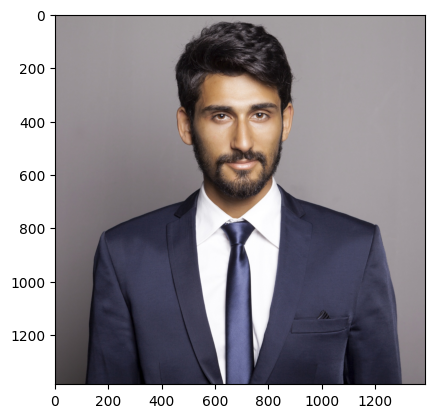

In [25]:
#Creating a figure and a sub-plot axis
fig, ax = plt.subplots()

#showing the image
ax.imshow(img)

In [26]:

# Select rows with the same image name as in the "name" column of the train dataframe
sel_df = train[train["name"] == sample_image_name]

# Convert all of the available "bbox" values into a list
bboxes = sel_df[["x1", "x2", "y1", "y2"]].values.tolist()

print(bboxes)


[[451, 186, 895, 697]]


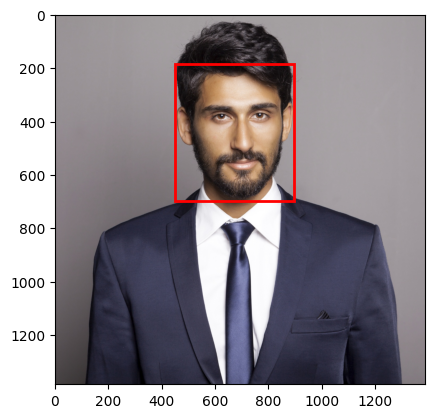

In [27]:
# Creating a figure and a sub-plot
fig, ax = plt.subplots()

# Showing the image
ax.imshow(img)

# Plotting the bounding boxes
for box in bboxes:

    x1, x2, y1, y2 = box

    # x and y co-ordinates
    xy = (x1, x2)

    # Width of box
    width = y1 - x1

    # Height of box
    height = y2 - x2

    rect = patches.Rectangle(
        xy,
        width,
        height,
        linewidth=2,
        edgecolor="r",
        facecolor="none",
    )

    ax.add_patch(rect)

In [28]:
img_size = 50
data = []

for index, row in train.iterrows():

    # Single row
    name, x1, x2, y1, y2, classname = row.values

    # Full file path
    full_file_path = images_file_path + name

    # Reading in the image array as a grayscale image
    img_array = cv2.imread(full_file_path, cv2.IMREAD_GRAYSCALE)

    # Selecting the portion covered by the bounding box
    crop_image = img_array[x2:y2, x1:y1]

    # Resizing the image
    new_img_array = cv2.resize(crop_image, (img_size, img_size))

    # Appending the arrays into a data variable along with bounding box
    data.append([new_img_array, classname])

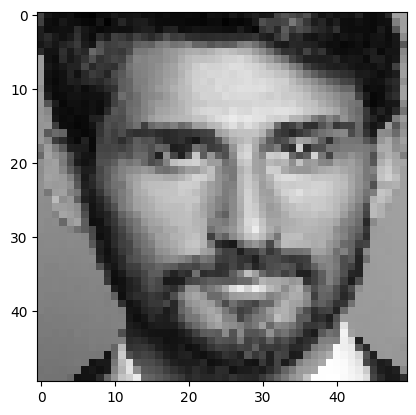

In [29]:
# Plotting one of the images after pre-processing
plt.imshow(data[0][0], cmap="gray")

In [30]:
# Initializing an empty list for features (independent variables)
x = []

# Initializing an empty list for labels (dependent variable)
y = []

for features, labels in data:
    x.append(features)
    y.append(labels)

Reshaping image size to a format

In [31]:
x[0].shape

(50, 50)

In [32]:
# Reshaping the feature array (Number of images, (IMG_SIZE, IMG_SIZE), Color depth)
x = np.array(x).reshape(-1,50,50,1)
x.shape

(5749, 50, 50, 1)

In [33]:
x[0].min(), x[0].max()

(4, 253)

In [34]:
# Normalizing to the range between 0 and 1
x = normalize(x,axis=1)

In [35]:
x[0].min(), x[0].max()

(0.006336624000624299, 0.3133853673620512)

Label encoding the target 'y'

In [36]:
print(y[:5])

['face_no_mask', 'face_with_mask', 'face_with_mask', 'face_with_mask', 'face_with_mask']


In [37]:
#label encoding y
lbl = LabelEncoder()
y = lbl.fit_transform(y)

In [38]:
print(y[:5])

[0 1 1 1 1]


afte label encoding
0 -> face_no_mask
1 -> face_with_mask

In [39]:
# Converting it into a categorical variable
y = to_categorical(y)

In [40]:
print(y[:5])

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


[1. 0.] face_no_mask
[0. 1.] face_with_mask

creating a CNN model and using it

In [41]:
print(x.shape)

(5749, 50, 50, 1)


In [42]:
#keeping only height, width and color depth/channel,
input_img_shape = x.shape[1:]
print(input_img_shape)

(50, 50, 1)


Craeting a Sequential Keras model

In [43]:
#Initialising a sequential keras model
model = Sequential()

Creating 2D convolutional layer

In [44]:
# Adding a 2D convolution layer
model.add(
    Conv2D(
        filters=100,
        kernel_size=(3, 3),
        use_bias=True,
        input_shape=input_img_shape,
        activation="relu",
        strides=2,
    )
)

Craeting a 2D MaxPooling

In [45]:
# Adding a max-pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [46]:
# Adding a 2D convolution layer - Output Shape = 10 x 10 x 64
model.add(Conv2D(filters=64, kernel_size=(3, 3), use_bias=True, activation="relu"))

# Adding a max-pooling layer - Output Shape = 5 x 5 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))

In [47]:
#Adding a flatten Layer
model.add(Flatten())

In [48]:
#Adding a dense Layer - Output Shape = 50
model.add(Dense(50, activation="relu"))

In [49]:
# Adding a dropout
model.add(Dropout(0.2))

#Adding a dense Layer with softmax activation
model.add(Dense(2, activation="softmax"))

In [50]:
#Printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 100)       1000      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 100)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        57664     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 50)                8

In [51]:
# Importing the required module
from tensorflow.keras.optimizers.legacy import Adam

# Initializing an Adam optimizer with the deprecated argument (if using the legacy optimizer)
opt = Adam(lr=1e-3, decay=1e-5)

# Configuring the model for training
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Training the model
model.fit(x, y, epochs=32, batch_size=5)


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/32
1150/1150 [==============================] - 17s 14ms/step - loss: 0.5532 - accuracy: 0.7269
Epoch 2/32
1150/1150 [==============================] - 15s 13ms/step - loss: 0.4496 - accuracy: 0.7791
Epoch 3/32
1150/1150 [==============================] - 15s 13ms/step - loss: 0.3980 - accuracy: 0.8229
Epoch 4/32
1150/1150 [==============================] - 15s 13ms/step - loss: 0.3546 - accuracy: 0.8435
Epoch 5/32
1150/1150 [==============================] - 15s 13ms/step - loss: 0.3211 - accuracy: 0.8589
Epoch 6/32
1150/1150 [==============================] - 15s 13ms/step - loss: 0.2930 - accuracy: 0.8687
Epoch 7/32
1150/1150 [==============================] - 15s 13ms/step - loss: 0.2650 - accuracy: 0.8869
Epoch 8/32
1150/1150 [==============================] - 15s 13ms/step - loss: 0.2460 - accuracy: 0.8995
Epoch 9/32
1150/1150 [==============================] - 15s 13ms/step - loss: 0.2240 - accuracy: 0.9085
Epoch 10/32
1150/1150 [==============================] - 15s 13m

Model evaluation


In [52]:
loss, accuracy = model.evaluate(x,y)
print('Test Accuracy =', accuracy)

180/180 [==============================] - 4s 22ms/step - loss: 0.0107 - accuracy: 0.9981
Test Accuracy = 0.9980866312980652


Making Predictions

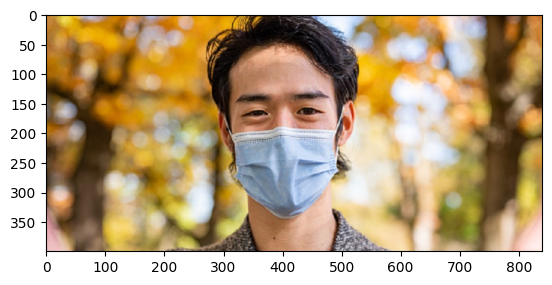

In [54]:
# Image file path for sample image
test_image_file_path = "Test1.jpg"

# Loading in the image
img = plt.imread(test_image_file_path)

# Showing the image
plt.imshow(img)

In [55]:
# Initializing the detector
detector = MTCNN()

# Detecting the faces in the image
faces = detector.detect_faces(img)

print(faces)

1/1 [==============================] - 0s 236ms/step
[{'box': [305, 71, 191, 245], 'confidence': 0.9999883770942688, 'keypoints': {'left_eye': (360, 171), 'right_eye': (447, 161), 'nose': (412, 219), 'mouth_left': (379, 260), 'mouth_right': (455, 254)}}, {'box': [668, 108, 72, 90], 'confidence': 0.9320043921470642, 'keypoints': {'left_eye': (689, 136), 'right_eye': (718, 137), 'nose': (699, 158), 'mouth_left': (688, 172), 'mouth_right': (713, 173)}}]


1/1 [==============================] - 0s 134ms/step


1/1 [==============================] - 0s 404ms/step


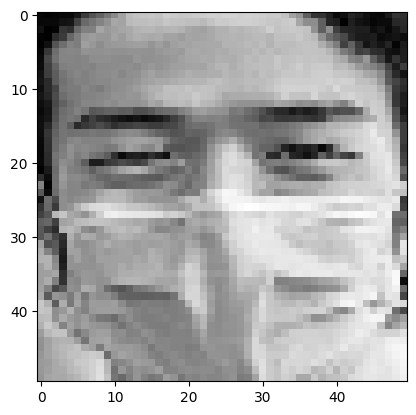

In [56]:
# Reading in the image as a grayscale image
img_array = cv2.imread(test_image_file_path, cv2.IMREAD_GRAYSCALE)

# Initializing the detector
detector = MTCNN()

# Detecting the faces in the image
faces = detector.detect_faces(img)

# Getting the values for bounding box
x1, x2, width, height = faces[0]["box"]

# Selecting the portion covered by the bounding box
crop_image = img_array[x2 : x2 + height, x1 : x1 + width]

# Resizing the image
new_img_array = cv2.resize(crop_image, (img_size, img_size))

# Plotting the image
plt.imshow(new_img_array, cmap="gray")

[1. 0.]: face_no_mask
[0. 1]: face_with_mask

In [57]:
# Reshaping the image
x = new_img_array.reshape(-1, 50, 50, 1)

# Normalizing
x = normalize(x, axis=1)

In [58]:
x.shape

(1, 50, 50, 1)

In [59]:
prediction = model.predict(x)
print(prediction)

1/1 [==============================] - 0s 96ms/step
[[4.8278566e-21 1.0000000e+00]]


If the probability value at index 0 is greater than the probability value at index 1, the classification is “face_no_mask” since we had assigned [1., 0.] as “face_no_mask” during training.
If the probability value at index 1 is greater than the probability value at index 0, the classification is “face_with_mask”.since we had assigned [0., 1.] as “face_with_mask” during training.

In [60]:
# Returns the index of the maximum value
np.argmax(prediction)

1

In [61]:
if np.argmax(prediction) == 1:
    print("face with mask")
else:
    print("face without mask")

face with mask
